<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Segment_Ajuste_mar_2021/Fig_05_BIG_Segmentation_abril_05_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 4.7MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 78.58 MiB | 33.27 MiB/s, done.
Resolving deltas: 100% (144/144), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)


In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     285  118.305832  111.386368  ...   15.672601    8.802352    2.324691
1     111  110.749863  115.541031  ...  175.065750  172.109558  155.259476
2     198   96.262512   98.196404  ...  137.657776  134.477905  115.869591
3     218   53.292652   56.634453  ...    0.000000    0.000000    0.000000
4      75   68.196449   81.868271  ...   75.970673   75.746666   77.195198
5     120   73.858887   72.147766  ...   26.795555   29.507780   31.712223
6     193   59.374340   52.322132  ...   56.688530   53.715351   55.290638
7     104   70.491135   77.707108  ...   49.744087   49.335804   47.665688
8     198    2.878278    1.478624  ...   79.064682   77.790733   79.890915
9     149   55.830509   77.875366  ...   81.701767   82.438774   80.944244
10    166  106.284950  112.563934  ...    0.067063    0.000000    0.000000
11    117   77.724083   76.510994  ...   61.076630   59.646801   59.365253
12    249  125.917801  12

In [11]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
filename = 'model_ANN.pkl'
model = joblib.load(filename)

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [12]:
cont = 0; num =25
img_graos = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  del df['Width']
  result = np.array(df)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

           0           1           2    ...        781        782        783
6     0.417274    0.096774    0.096774  ...   0.000000   0.000000   0.000000
48    1.000000    1.179200    1.448000  ...  16.936001  16.760000  16.760000
49    0.951088    0.715668    0.413867  ...   0.577264   0.852459   0.511690
34  136.015442  136.812119  135.881104  ...   4.678954   4.901308   5.362663
44    1.203977    0.918033    1.166353  ...  13.131954  13.164472  13.299919
17   97.726562   97.328125   95.914062  ...  13.726562  13.953125  14.171875
14   26.824219   52.773438   67.460938  ...   2.449219   2.640625   2.175781
43   69.205788   68.269562   68.447739  ...   0.000000   0.000000   0.000000
26    0.000000    0.000000    0.925926  ...   0.000000   0.000000   0.000000
34    3.457619    3.103189    3.744752  ...   1.310527   1.371896   1.668002
44    0.000000    0.000000    0.000000  ...   1.000000   1.000000   1.000000
10   15.724432    9.664989    4.654626  ...  12.345984  12.091602  12.259259

In [33]:
np.sum(np.array(img_graos.iloc[[1],:]))/(28*28)

1.013200000672107

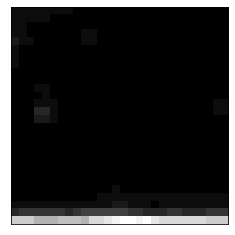

In [34]:
data=np.array(img_graos.iloc[[1],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

In [35]:
np.sum(np.array(img_graos.iloc[[3],:]))/(28*28)

5.850772760974776

In [36]:
img_graos.iloc[[3],:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
34,136.015442,136.812119,135.881104,135.14386,133.992874,130.722946,125.469673,119.181915,104.300827,43.746731,8.328181,1.726516,1.0,1.0,0.466112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.653976,132.193817,132.551727,131.89537,131.816879,129.407837,123.726509,108.073715,51.651604,8.29132,2.713436,1.067777,...,2.023781,1.448276,1.525565,2.036861,1.673008,1.332937,1.0,1.309156,1.896552,2.731272,1.60761,1.517241,5.612366,5.36742,5.2283,5.463734,5.269917,4.63258,4.715815,4.615933,4.732461,5.365042,5.498216,4.765755,4.482759,4.482759,4.499405,4.699168,5.008324,5.37931,5.46849,6.222354,5.770511,5.711058,5.195005,4.386445,4.082045,4.678954,4.901308,5.362663


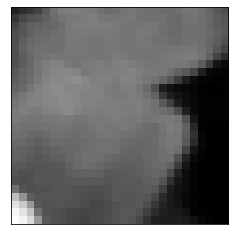

In [30]:
data=np.array(img_graos.iloc[[3],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

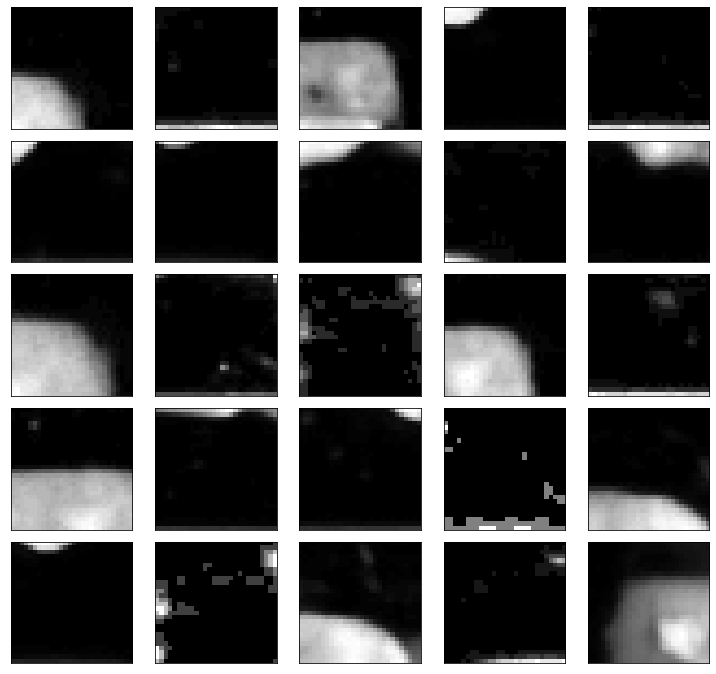

In [13]:
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(img_graos.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

In [14]:
print(np.random.rand(1,3))

[[0.83571335 0.06003775 0.41114159]]
